In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img,img_to_array


In [5]:
#conect drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#create data
drive.mount('/content/drive',force_remount=True)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_10foodVN/train',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_10foodVN/test',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [7]:
#create model
model=Sequential()

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
4/4 [==============================] - 68s 15s/step - loss: 2.8626 - accuracy: 0.0800 - val_loss: 2.3022 - val_accuracy: 0.0667
Epoch 2/50
4/4 [==============================] - 10s 2s/step - loss: 2.2996 - accuracy: 0.1200 - val_loss: 2.2960 - val_accuracy: 0.0667
Epoch 3/50
4/4 [==============================] - 10s 2s/step - loss: 2.2989 - accuracy: 0.1300 - val_loss: 2.2979 - val_accuracy: 0.0667
Epoch 4/50
4/4 [==============================] - 10s 2s/step - loss: 2.2883 - accuracy: 0.1200 - val_loss: 2.3064 - val_accuracy: 0.0667
Epoch 5/50
4/4 [==============================] - 10s 2s/step - loss: 2.2588 - accuracy: 0.1600 - val_loss: 2.3035 - val_accuracy: 0.1333
Epoch 6/50
4/4 [==============================] - 10s 2s/step - loss: 2.2310 - accuracy: 0.1400 - val_loss: 2.3873 - val_accuracy: 0.1000
Epoch 7/50
4/4 [==============================] - 10s 2s/step - loss: 2.2349 - accuracy: 0.1900 - val_loss: 2.3358 - val_accuracy: 0.1333
Epoch 8/50
4/4 [=================

In [8]:
model.save('CNN_10foodVN.h5')

In [7]:
label = ['BanhMi','BanhXeo','BunBo','BunRieu','BunThitNuong','ComSuon','Goi','GoiCuon','Nem','Pho']

Test loss=  5.6939239501953125
Test accuracy=  0.4000000059604645


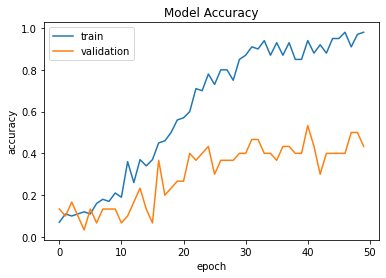

In [8]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

BanhXeo


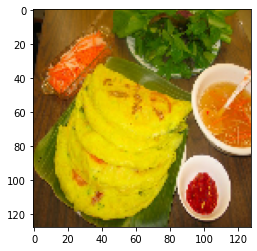

In [9]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/banhxeo.jpg', target_size = (128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])